# Load Libraries

In [40]:
import pandas as pd
import numpy as np
import FinancialMetricsLib as finmet
import FactorModelLib as factor_model
import FactorMomentumLib as factor_momentum
import TrendFilteringLib as tf
import importlib as imp
import statsmodels.api as sm

# Import data

In [2]:
macro_data = pd.read_csv('Data/FedMacroDataCleaned.csv')

In [3]:
macro_data = macro_data[:-1]
macro_data['Date'] = pd.to_datetime(macro_data['Date'])

In [4]:
macro_data

,Date,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,VXOCLSx
0,2059-01-01,0.003934,0.003576,0.010350,0.007400,0.007310,0.019395,0.013406,0.008629,0.007308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2059-02-01,0.006431,0.007374,0.009394,-0.003416,0.008321,0.014302,0.006034,0.004894,0.000000,...,0.000261,-0.000022,-0.008147,0.004819,NaN,0.001066,0.004929,0.004138,-0.014792,NaN
2,2059-03-01,0.006498,0.007019,-0.003576,0.019929,0.000616,0.021079,0.014341,0.014547,0.015655,...,0.001835,-0.000022,0.012203,-0.004890,NaN,-0.002539,0.012134,0.006734,0.024929,NaN
3,2059-04-01,0.005826,0.006629,0.011984,0.006796,0.007803,0.014951,0.008266,0.009581,0.004765,...,-0.002019,-0.000021,-0.004090,-0.004819,NaN,0.004646,0.002828,0.002020,-0.015342,NaN
4,2059-05-01,0.003108,0.003022,0.003646,-0.000027,0.009064,0.001141,0.007034,0.007127,-0.004765,...,0.002087,-0.004619,0.003992,0.004796,NaN,-0.000760,0.009726,0.009007,-0.012252,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,2020-06-01,0.006336,0.014149,0.012139,0.022510,0.011185,0.040973,0.042236,0.047744,0.044728,...,-0.000355,0.002755,-0.012691,0.014980,-5.6,-0.007247,-0.005812,0.000768,-0.005661,24.3785
738,2020-07-01,-0.029106,0.012005,0.009006,0.002694,0.013863,0.007524,0.010738,0.010721,0.007076,...,0.000512,-0.000790,0.003409,-0.007930,1.6,-0.003106,-0.005675,-0.002653,-0.015839,20.2777
739,2020-08-01,0.006050,0.009971,0.011195,0.006225,0.017084,-0.000595,-0.003334,-0.006095,-0.008195,...,0.001022,-0.001964,-0.012646,0.006542,6.3,0.006332,-0.008449,-0.000808,-0.001330,28.3241
740,2020-09-01,-0.006708,0.007348,0.002979,0.006452,-0.000512,0.009432,0.008937,0.005335,0.003124,...,-0.001854,0.004702,0.020860,-0.007854,1.4,-0.002406,0.002747,0.000376,0.004360,30.9408


In [5]:
factor_momentum_data = pd.read_csv('Data/FactorMomentumHistoricalReturns.csv')
factor_momentum_data['Date'] = pd.to_datetime(factor_momentum_data['Date'])

In [6]:
combined_data = factor_momentum_data.merge(macro_data, left_on='Date', right_on='Date', how='left')

In [7]:
combined_data

,Date,Time-series Factor Momentum,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,VXOCLSx
0,1973-02-01,0.014060,0.001243,0.000445,0.001324,-0.004001,0.007570,0.000470,0.003500,0.003792,...,0.000824,0.004728,0.017230,-0.000007,NaN,-0.001914,0.000869,-0.000760,0.013635,20.0866
1,1973-03-01,0.011390,0.001891,0.003017,-0.003915,-0.004146,-0.007356,-0.001382,-0.004119,-0.005064,...,0.002197,0.002322,-0.000012,0.005122,NaN,0.002258,0.004073,0.004763,0.004937,20.1652
2,1973-04-01,0.026876,0.004379,0.003659,0.002098,-0.003210,0.000000,0.006414,0.006328,0.006417,...,-0.001858,-0.002378,-0.001729,-0.002600,NaN,0.003795,0.006826,0.008559,-0.009523,25.6842
3,1973-05-01,0.018066,0.002792,0.003808,-0.002500,-0.001998,0.009146,0.000686,-0.000492,-0.001328,...,0.000801,0.002296,0.005130,-0.000026,NaN,-0.000379,0.003895,-0.001353,0.011805,22.8772
4,1973-06-01,0.010844,0.002948,0.003909,0.007910,0.013536,0.000306,0.004125,0.004015,0.003442,...,0.000080,-0.000048,-0.005144,0.002490,NaN,-0.002934,-0.004669,0.000397,-0.006092,21.5127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2020-02-01,-0.020333,-0.015946,-0.024917,-0.066825,-0.037752,-0.085739,-0.044667,-0.057064,-0.060087,...,-0.001700,-0.000406,-0.000003,-0.000904,-11.9,0.041681,0.004734,0.001469,0.021319,63.8800
565,2020-03-01,0.007800,0.122343,-0.059843,-0.130778,-0.119006,-0.159099,-0.135622,-0.153028,-0.161809,...,-0.002320,-0.004363,-0.014556,0.001750,-17.3,0.043034,0.004010,-0.000797,-0.029368,42.8997
566,2020-04-01,-0.094200,-0.042646,0.017038,0.081790,0.074947,0.167881,0.008679,0.037415,0.044329,...,0.004857,0.009097,0.023939,-0.003976,0.5,-0.034388,0.016393,0.010694,0.007230,30.4751
567,2020-05-01,-0.009350,-0.015527,0.015628,0.057608,0.068793,0.082043,0.060489,0.070526,0.084181,...,-0.000432,-0.007905,0.000902,-0.007492,5.8,-0.042202,0.004247,0.000994,0.026534,30.0744


## Step 1: Calculate Regime Labels

In [8]:
FF_data = pd.read_csv('Data/F-F_Research_Data_5_Factors_2x3_cleaned.csv')
cols = list(FF_data.columns)
cols.remove('Unnamed: 0')
FF_data[cols] = FF_data[cols]/100
FF_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
FF_data['Date'] = pd.to_datetime(FF_data['Date'], format='%Y%m')

In [9]:
FF_data['Mkt'] = FF_data['Mkt-RF'] + FF_data['RF']

In [10]:
FF_data

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,Mkt
0,1963-07-01,-0.0039,-0.0047,-0.0083,0.0066,-0.0115,0.0027,-0.0012
1,1963-08-01,0.0507,-0.0079,0.0167,0.0040,-0.0040,0.0025,0.0532
2,1963-09-01,-0.0157,-0.0048,0.0018,-0.0076,0.0024,0.0027,-0.0130
3,1963-10-01,0.0253,-0.0129,-0.0010,0.0275,-0.0224,0.0029,0.0282
4,1963-11-01,-0.0085,-0.0084,0.0171,-0.0045,0.0222,0.0027,-0.0058
...,...,...,...,...,...,...,...,...
684,2020-07-01,0.0577,-0.0303,-0.0131,0.0055,0.0106,0.0001,0.0578
685,2020-08-01,0.0763,-0.0094,-0.0295,0.0427,-0.0144,0.0001,0.0764
686,2020-09-01,-0.0363,0.0007,-0.0256,-0.0115,-0.0177,0.0001,-0.0362
687,2020-10-01,-0.0210,0.0476,0.0388,-0.0060,-0.0053,0.0001,-0.0209


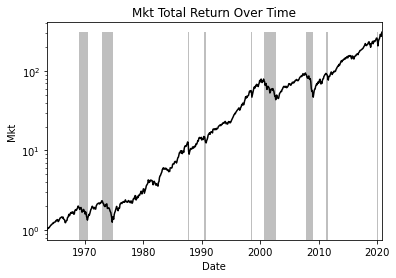

In [11]:
imp.reload(tf)
regimesLabels = tf.filter_time_series(FF_data, 'Mkt', 'Date', .17)
FF_data['Mkt Regime'] = regimesLabels['Regime']
tf.plot_returns_regime(FF_data[['Date','Mkt','Mkt Regime']],
                           'Mkt', 'Mkt Regime', flag='Total Return',date='Date')

In [12]:
FF_data['Is Crash'] = (-1*FF_data['Mkt Regime'] + 1)/2
FF_data.tail(15)

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,Mkt,Mkt Regime,Is Crash
674,2019-09-01,0.0143,0.0026,0.0678,0.0199,0.0350,0.0018,0.0161,1.0,0.0
675,2019-10-01,0.0206,0.0021,-0.0209,0.0025,-0.0099,0.0015,0.0221,1.0,0.0
676,2019-11-01,0.0387,0.0050,-0.0187,-0.0158,-0.0124,0.0012,0.0399,1.0,0.0
677,2019-12-01,0.0277,0.0096,0.0193,0.0009,0.0129,0.0014,0.0291,1.0,0.0
678,2020-01-01,-0.0011,-0.0441,-0.0630,-0.0136,-0.0234,0.0013,0.0002,1.0,0.0
679,2020-02-01,-0.0813,-0.0004,-0.0396,-0.0161,-0.0249,0.0012,-0.0801,-1.0,1.0
680,2020-03-01,-0.1338,-0.0840,-0.1411,-0.0138,0.0121,0.0012,-0.1326,-1.0,1.0
681,2020-04-01,0.1365,0.0279,-0.0135,0.0251,-0.0103,0.0000,0.1365,1.0,0.0
682,2020-05-01,0.0558,0.0192,-0.0495,0.0071,-0.0328,0.0001,0.0559,1.0,0.0
683,2020-06-01,0.0246,0.0194,-0.0222,0.0003,0.0034,0.0001,0.0247,1.0,0.0


# Step 2: Merge and scale the data

In [13]:
pred_cols = list(macro_data.columns)
pred_cols.remove('Date')
pred_cols.append('Mkt-RF')

In [14]:
combined_data = combined_data.merge(FF_data[['Date', 'Is Crash', 'Mkt-RF']], left_on='Date', right_on='Date', how='left')

In [15]:
combined_data

,Date,Time-series Factor Momentum,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,...,CES2000000008,CES3000000008,UMCSENTx,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,VXOCLSx,Is Crash,Mkt-RF
0,1973-02-01,0.014060,0.001243,0.000445,0.001324,-0.004001,0.007570,0.000470,0.003500,0.003792,...,0.017230,-0.000007,NaN,-0.001914,0.000869,-0.000760,0.013635,20.0866,1.0,-0.0485
1,1973-03-01,0.011390,0.001891,0.003017,-0.003915,-0.004146,-0.007356,-0.001382,-0.004119,-0.005064,...,-0.000012,0.005122,NaN,0.002258,0.004073,0.004763,0.004937,20.1652,1.0,-0.0130
2,1973-04-01,0.026876,0.004379,0.003659,0.002098,-0.003210,0.000000,0.006414,0.006328,0.006417,...,-0.001729,-0.002600,NaN,0.003795,0.006826,0.008559,-0.009523,25.6842,1.0,-0.0568
3,1973-05-01,0.018066,0.002792,0.003808,-0.002500,-0.001998,0.009146,0.000686,-0.000492,-0.001328,...,0.005130,-0.000026,NaN,-0.000379,0.003895,-0.001353,0.011805,22.8772,1.0,-0.0294
4,1973-06-01,0.010844,0.002948,0.003909,0.007910,0.013536,0.000306,0.004125,0.004015,0.003442,...,-0.005144,0.002490,NaN,-0.002934,-0.004669,0.000397,-0.006092,21.5127,1.0,-0.0156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2020-02-01,-0.020333,-0.015946,-0.024917,-0.066825,-0.037752,-0.085739,-0.044667,-0.057064,-0.060087,...,-0.000003,-0.000904,-11.9,0.041681,0.004734,0.001469,0.021319,63.8800,1.0,-0.0813
565,2020-03-01,0.007800,0.122343,-0.059843,-0.130778,-0.119006,-0.159099,-0.135622,-0.153028,-0.161809,...,-0.014556,0.001750,-17.3,0.043034,0.004010,-0.000797,-0.029368,42.8997,1.0,-0.1338
566,2020-04-01,-0.094200,-0.042646,0.017038,0.081790,0.074947,0.167881,0.008679,0.037415,0.044329,...,0.023939,-0.003976,0.5,-0.034388,0.016393,0.010694,0.007230,30.4751,0.0,0.1365
567,2020-05-01,-0.009350,-0.015527,0.015628,0.057608,0.068793,0.082043,0.060489,0.070526,0.084181,...,0.000902,-0.007492,5.8,-0.042202,0.004247,0.000994,0.026534,30.0744,0.0,0.0558


In [16]:
scaled_data = combined_data.copy()

In [17]:
scaled_data[pred_cols] = (scaled_data[pred_cols] - scaled_data[pred_cols].mean())/scaled_data[pred_cols].std()
scaled_data['Time-series Factor Momentum'] = scaled_data['Time-series Factor Momentum']/scaled_data['Time-series Factor Momentum'].std()

In [18]:
scaled_data.mean()

<ipython-input-18-d27d640b6130>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  scaled_data.mean()


Time-series Factor Momentum    3.497774e-01
RPI                            1.316073e-16
W875RX1                        1.974597e-16
DPCERA3M086SBEA                1.518020e-16
CMRMTSPLx                     -8.858370e-17
                                   ...     
DTCTHFNM                      -2.182886e-18
INVEST                        -3.707247e-18
VXOCLSx                       -2.124058e-15
Is Crash                       1.370826e-01
Mkt-RF                         1.260464e-16
Length: 131, dtype: float64

In [19]:
scaled_data.std()

Time-series Factor Momentum    1.000000
RPI                            1.000000
W875RX1                        1.000000
DPCERA3M086SBEA                1.000000
CMRMTSPLx                      1.000000
                                 ...   
DTCTHFNM                       1.000000
INVEST                         1.000000
VXOCLSx                        1.000000
Is Crash                       0.344237
Mkt-RF                         1.000000
Length: 131, dtype: float64

In [20]:
scaled_data.fillna(0, inplace=True)

In [21]:
scaled_data

,Date,Time-series Factor Momentum,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,...,CES2000000008,CES3000000008,UMCSENTx,MZMSL,DTCOLNVHFNM,DTCTHFNM,INVEST,VXOCLSx,Is Crash,Mkt-RF
0,1973-02-01,0.876741,-0.140948,-0.238523,-0.102940,-0.516135,0.200116,-0.094913,0.208481,0.207943,...,2.291690,-0.004418,0.000000,-0.279159,0.030799,-0.034026,1.303494,0.003363,1.0,-1.180913
1,1973-03-01,0.710293,-0.059499,0.140880,-0.689946,-0.528705,-0.744029,-0.284045,-0.514933,-0.561176,...,-0.004648,1.282133,0.000000,0.327639,0.149267,0.211500,0.466935,0.013579,1.0,-0.406709
2,1973-04-01,1.675969,0.253491,0.235679,-0.016182,-0.447208,-0.278715,0.512264,0.477013,0.435890,...,-0.233286,-0.655059,0.000000,0.551304,0.251077,0.380282,-0.923797,0.730842,1.0,-1.361924
3,1973-05-01,1.126572,0.053812,0.257648,-0.531368,-0.341599,0.299791,-0.072867,-0.170589,-0.236742,...,0.680130,-0.009240,0.000000,-0.055890,0.142678,-0.060404,1.127541,0.366037,1.0,-0.764369
4,1973-06-01,0.676188,0.073480,0.272547,0.635014,1.011752,-0.259374,0.278499,0.257359,0.177500,...,-0.688210,0.621958,0.000000,-0.427531,-0.173954,0.017410,-0.593817,0.188703,1.0,-0.463411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2020-02-01,-1.267961,-2.303046,-3.980345,-7.738488,-3.456505,-5.701980,-4.705461,-5.541805,-5.339410,...,-0.003460,-0.229604,-2.982607,6.061983,0.173715,0.065053,2.042525,5.694868,1.0,-1.896233
565,2020-03-01,0.486398,15.091159,-9.133207,-14.903995,-10.535372,-10.342224,-13.996277,-14.653155,-14.173137,...,-1.941739,0.436185,-4.338561,6.258821,0.146962,-0.035691,-2.832490,2.968214,1.0,-3.041183
566,2020-04-01,-5.874195,-5.661336,2.209494,8.912688,6.361852,10.340315,0.743581,3.428540,3.728184,...,3.185281,-1.000255,0.131066,-5.002645,0.604792,0.475239,0.687519,1.353480,0.0,2.853671
567,2020-05-01,-0.583054,-2.250371,2.001507,6.203280,5.825712,4.910789,6.035882,6.572242,7.189020,...,0.117029,-1.882401,1.461910,-6.139188,0.155711,0.043925,2.544125,1.301404,0.0,1.093720


In [22]:
pred_cols.append('Is Crash')

In [23]:
scaled_data['Is Crash'] = scaled_data['Is Crash']/scaled_data['Is Crash'].std()

# Run the cross validated Elastic Net Regression

In [24]:
options = factor_model.create_options_cv_elastic_net()
options['returnModel'] = True
options['minAlpha'] = 1e-4
options['maxAlpha'] = 25
options['nFolds'] = 5

In [25]:
model_el_with_mkt = factor_model.cross_validated_elastic_net_regression(scaled_data, 'Time-series Factor Momentum',
                                                            pred_cols, options)

Dependent Variable is Time-series Factor Momentum
Time period is between Febuary 1973 to June 2020 inclusive   
Best Alpha = 0.5103020408163266
Best l1Ratio = 0.18183755102040813
         Intercept  RPI  W875RX1  DPCERA3M086SBEA  CMRMTSPLx  RETAILx  INDPRO  \
No Name   0.332254  0.0     -0.0             -0.0       -0.0     -0.0     0.0   

         IPFPNSS  IPFINAL  IPCONGD  ...  CES2000000008  CES3000000008  \
No Name      0.0      0.0      0.0  ...           -0.0            0.0   

         UMCSENTx  MZMSL  DTCOLNVHFNM  DTCTHFNM  INVEST  VXOCLSx   Mkt-RF  \
No Name       0.0    0.0         -0.0       0.0    -0.0      0.0 -0.16218   

         Is Crash  
No Name  0.044003  

[1 rows x 131 columns]


In [26]:
model_el_with_mkt.coef_

array([ 0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.00727745,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.00498676,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.00275404,
       -0.        ,  0.        ,  0.        , -0.01528122,  0.01

# Run Same Regression without Mkt-RF

In [27]:
pred_cols_2 = pred_cols.copy()
pred_cols_2.remove('Mkt-RF')

In [28]:
model_el_wo_mkt = factor_model.cross_validated_elastic_net_regression(scaled_data, 'Time-series Factor Momentum',
                                                            pred_cols_2, options)

Dependent Variable is Time-series Factor Momentum
Time period is between Febuary 1973 to June 2020 inclusive   
Best Alpha = 0.5103020408163266
Best l1Ratio = 0.18183755102040813
         Intercept  RPI  W875RX1  DPCERA3M086SBEA  CMRMTSPLx   RETAILx  \
No Name    0.32189  0.0     -0.0             -0.0       -0.0 -0.016268   

         INDPRO  IPFPNSS  IPFINAL  IPCONGD  ...  CES0600000008  CES2000000008  \
No Name     0.0      0.0      0.0      0.0  ...           -0.0           -0.0   

         CES3000000008  UMCSENTx  MZMSL  DTCOLNVHFNM  DTCTHFNM  INVEST  \
No Name            0.0      -0.0    0.0         -0.0       0.0    -0.0   

         VXOCLSx  Is Crash  
No Name      0.0   0.07003  

[1 rows x 130 columns]


In [29]:
model_el_wo_mkt.coef_

array([ 0.        , -0.        , -0.        , -0.        , -0.01626798,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.00670951,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.00212388, -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.00159726,  0.        ,  0.00036559,
        0.0067261 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.00141597,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.01443615,  0.00

# Run Regressions using the variables selected from the elastic net

In [32]:
coefs_df_with_crash_ind = pd.DataFrame(model_el_with_mkt.coef_, index=pred_cols, columns=['Coef_Val_FROM_EL'])

In [35]:
coefs_df_with_crash_ind[coefs_df_with_crash_ind['Coef_Val_FROM_EL']!=0]

,Coef_Val_FROM_EL
IPMAT,0.007277
HOUSTS,0.004987
M2SL,0.002754
NONBORRES,-0.015281
BUSLOANS,0.010263
S&P 500,-0.003076
S&P: indust,-0.031718
OILPRICEx,-0.007562
Mkt-RF,-0.162180
Is Crash,0.044003


In [37]:
coefs_df_wo_crash_ind = pd.DataFrame(model_el_wo_mkt.coef_, index=pred_cols_2, columns=['Coef_Val_FROM_EL'])
coefs_df_wo_crash_ind[coefs_df_wo_crash_ind['Coef_Val_FROM_EL']!=0]

,Coef_Val_FROM_EL
RETAILx,-0.016268
IPMAT,0.006710
UEMPLT5,0.002124
HOUST,0.001597
HOUSTMW,0.000366
HOUSTS,0.006726
ISRATIOx,0.001416
NONBORRES,-0.014436
BUSLOANS,0.009228
S&P 500,-0.032151


# Take cols from the regression, and save them into another list

In [38]:
cols_for_reg = list(coefs_df_with_crash_ind[coefs_df_with_crash_ind['Coef_Val_FROM_EL']!=0].index)

In [39]:
cols_for_reg

['IPMAT',
 'HOUSTS',
 'M2SL',
 'NONBORRES',
 'BUSLOANS',
 'S&P 500',
 'S&P: indust',
 'OILPRICEx',
 'Mkt-RF',
 'Is Crash']

In [41]:
l = cols_for_reg
X = scaled_data[l]
y = scaled_data[['Time-series Factor Momentum']]
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Time-series Factor Momentum   R-squared:                       0.209
Model:                                     OLS   Adj. R-squared:                  0.194
Method:                          Least Squares   F-statistic:                     14.71
Date:                         Sun, 24 Jan 2021   Prob (F-statistic):           2.29e-23
Time:                                 14:57:44   Log-Likelihood:                -740.29
No. Observations:                          569   AIC:                             1503.
Df Residuals:                              558   BIC:                             1550.
Df Model:                                   10                                         
Covariance Type:                     nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2910      0.041      7.024      0.000       0.210       0.372
IPMAT           0.1442      0.041      3.542      0.000       0.064       0.224
HOUSTS          0.0783      0.038      2.048      0.041       0.003       0.153
M2SL            0.1098      0.043      2.558      0.011       0.025       0.194
NONBORRES      -0.1258      0.038     -3.316      0.001      -0.200      -0.051
BUSLOANS        0.0556      0.043      1.308      0.192      -0.028       0.139
S&P 500         0.6001      0.256      2.343      0.019       0.097       1.103
S&P: indust    -0.5869      0.256     -2.289      0.022      -1.091      -0.083
OILPRICEx      -0.0661      0.039     -1.700      0.090      -0.143       0.010
Mkt-RF         -0.2966      0.046     -6.384      0.000      -0.388      -0.205
Is Crash        0.1477      0.044      3.394      0.001       0.062       0.233
==============================================================================
Omnibus:                       51.631   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.773
Skew:                          -0.324   Prob(JB):                     2.28e-42
Kurtosis:                       5.769   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
reg2_cols = cols_for_reg.copy()
reg2_cols.remove('S&P 500')
reg2_cols.remove('OILPRICEx')
reg2_cols.remove('S&P: indust')
reg2_cols.remove('BUSLOANS')


In [47]:
l = reg2_cols
X = scaled_data[l]
y = scaled_data[['Time-series Factor Momentum']]
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Time-series Factor Momentum   R-squared:                       0.193
Model:                                     OLS   Adj. R-squared:                  0.184
Method:                          Least Squares   F-statistic:                     22.39
Date:                         Sun, 24 Jan 2021   Prob (F-statistic):           1.06e-23
Time:                                 15:03:54   Log-Likelihood:                -745.89
No. Observations:                          569   AIC:                             1506.
Df Residuals:                              562   BIC:                             1536.
Df Model:                                    6                                         
Covariance Type:                     nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2962      0.041      7.154      0.000       0.215       0.378
IPMAT          0.1500      0.040      3.711      0.000       0.071       0.229
HOUSTS         0.0829      0.038      2.154      0.032       0.007       0.158
M2SL           0.1334      0.039      3.387      0.001       0.056       0.211
NONBORRES     -0.1231      0.038     -3.242      0.001      -0.198      -0.049
Mkt-RF        -0.3070      0.041     -7.414      0.000      -0.388      -0.226
Is Crash       0.1345      0.042      3.195      0.001       0.052       0.217
==============================================================================
Omnibus:                       59.439   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.740
Skew:                          -0.354   Prob(JB):                     1.31e-55
Kurtosis:                       6.187   Cond. No.                         1.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
reg3_cols = ['Mkt-RF', 'Is Crash']
l = reg3_cols
X = scaled_data[l]
y = scaled_data[['Time-series Factor Momentum']]
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Time-series Factor Momentum   R-squared:                       0.139
Model:                                     OLS   Adj. R-squared:                  0.136
Method:                          Least Squares   F-statistic:                     45.87
Date:                         Sun, 24 Jan 2021   Prob (F-statistic):           3.46e-19
Time:                                 15:52:33   Log-Likelihood:                -764.14
No. Observations:                          569   AIC:                             1534.
Df Residuals:                              566   BIC:                             1547.
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3077      0.042      7.243      0.000       0.224       0.391
Mkt-RF        -0.3185      0.043     -7.491      0.000      -0.402      -0.235
Is Crash       0.1058      0.043      2.488      0.013       0.022       0.189
==============================================================================
Omnibus:                       83.713   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              439.621
Skew:                          -0.512   Prob(JB):                     3.45e-96
Kurtosis:                       7.182   Cond. No.                         1.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""